In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
import string
import matplotlib
from matplotlib.collections import PathCollection
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter

# scikit allel analysis
import random
random.seed(42)

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

grid_grey = "#e0e0e0"
grey = "#BDBDBD"
border_width = 0.5
threshold_line_width = .75
linewidth = 6.202 # linewidth from latex document


ts_green = "#3D8F24"
ts_purple = "#6E38CC"

sns.set_context("paper", rc={"font.size": 8,
                             "axes.labelsize": 8,
                             "xtick.labelsize": 8,
                             "ytick.labelsize": 8,
                             "legend.fontsize": 8,
                             "legend.title_fontsize": 8,
                             "axes.linewidth": border_width}) 

In [2]:
def circled(x):
    return chr(0x245F+x)

In [57]:
df = pd.read_csv("microhomology_df.tsv", delimiter="\t")

homology_12 = list(df["homology_12"])
homology_34 = list(df["homology_34"])
label_12 = ["{} to {}".format(circled(1), circled(2))] * len(homology_12)
label_34 = ["{} to {}".format(circled(3), circled(4))] * len(homology_34)
homs = homology_12 + homology_34
labs = label_12 + label_34

hom_dic = {"homs": homs,
           "label": labs}

df_2 = pd.DataFrame.from_dict(hom_dic)

df = df.sort_values("len_23")

bins = [0, 5, 10, np.inf]
names = ["≤5", '6-10', '>10']

df["len_23_bin"] = pd.cut(df["len_23"], bins, labels=names)

df.head()

homology_12  homology_34  len_23  event_type  \
15            0            0       3  1432, 3214   
0             0            0       4  1432, 3214   
36            0            1       4  1432, 3214   
39            2            0       4  1432, 3214   
41           12            0       4  1432, 3214   

                                             event_id len_23_bin  
15  filtered_events_both_parameters_pass/e23c591e-...         ≤5  
0   filtered_events_both_parameters_pass/123c9d1c-...         ≤5  
36  filtered_events_both_parameters_pass/8fb7fcac-...         ≤5  
39  filtered_events_both_parameters_pass/cf2d34c4-...         ≤5  
41  filtered_events_both_parameters_pass/8c233a11-...         ≤5

In [4]:
fpath = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
prop = matplotlib.font_manager.FontProperties(fname=fpath)

In [22]:
np.linspace(0, 12, 12)

array([ 0.        ,  1.09090909,  2.18181818,  3.27272727,  4.36363636,
        5.45454545,  6.54545455,  7.63636364,  8.72727273,  9.81818182,
       10.90909091, 12.        ])

In [31]:
np.arange(df_2[df_2["label"] == "① to ②"]["homs"].max())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [49]:

onetwo_homol_arr = np.arange(df_2[df_2["label"] == "① to ②"]["homs"].max()+1)
onetwo_count_arr = list(df_2[df_2["label"] == "① to ②"]["homs"])
for i in onetwo_homol_arr:
    onetwo_homol_arr[i] = onetwo_count_arr.count(i)


threefour_homol_arr = np.arange(df_2[df_2["label"] != "① to ②"]["homs"].max()+1)
threefour_count_arr = list(df_2[df_2["label"] != "① to ②"]["homs"])
for i in threefour_homol_arr:
    threefour_homol_arr[i] = threefour_count_arr.count(i)

In [48]:
np.arange(df_2[df_2["label"] == "① to ②"]["homs"].max()+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [42]:
np.arange(len(onetwo_homol_arr))+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [82]:
from scipy.stats import gaussian_kde

xy = np.vstack([df["homology_12"],df["homology_34"]])
z = gaussian_kde(xy)(xy)

In [137]:
zero_count = 0

for i,j in zip(df["homology_12"],df["homology_34"]):
    if "{}{}".format(i,j) == "21":
        zero_count += 1
zero_count

1

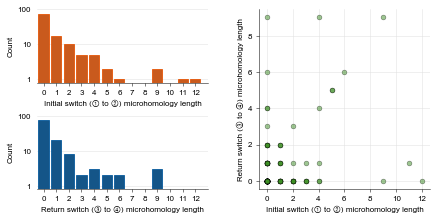

In [161]:
fig = plt.figure(figsize=(linewidth, linewidth/2))

bins = np.linspace(0, 1, 12)

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[1,0]) # First row, second column
ax3=fig.add_subplot(gs[:,1]) # First row, third column

ax = [ax1, ax2, ax3]

fpath = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
prop = matplotlib.font_manager.FontProperties(fname=fpath)

sns.scatterplot(data=df,
                x="homology_12",
                y="homology_34",
                # hue="len_23_bin",
                ax=ax[2],
                color=ts_green,
                linewidth=.5,
                edgecolor="black",
                # c=z,
                # palette="viridis",
                clip_on=False, alpha=.5)

ax[2].set_xlabel("Initial switch ({} to {}) microhomology length".format(circled(1), circled(2)), font=prop)
ax[2].set_ylabel("Return switch ({} to {}) microhomology length".format(circled(3), circled(4)), font=prop)

pal = ["#E65100", "#01579B"]

sns.barplot(y=onetwo_homol_arr,
            x=np.arange(len(onetwo_homol_arr))+1,
            ax=ax[0],
            color=pal[0],
            edgecolor=pal[0])

sns.barplot(y=threefour_homol_arr,
            x=np.arange(len(threefour_homol_arr))+1,
            ax=ax[1],
            color=pal[1],
            edgecolor=pal[1])

ax[0].set_xlabel("Count")
ax[0].set_xlabel("Initial switch ({} to {}) microhomology length".format(circled(1), circled(2)), font=prop)

ax[1].set_xlabel("Count")
ax[1].set_xlabel("Return switch ({} to {}) microhomology length".format(circled(3), circled(4)), font=prop)

for label in ax[0].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[1].get_xticklabels():
    label.set_fontproperties(prop)

ax[0].set_yscale("log")
ax[1].set_yscale("log")

for a in [ax[0], ax[1]]:
    for a2 in [a.xaxis, a.yaxis]:
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        a2.set_major_formatter(formatter)
    a.set_yticks([1,10,100])
    a.set_ylim(bottom=0.8,top=100)
    a.set_xlim(right=13)
    a.set_xticks(np.arange(13))
    a.set_ylabel("Count")

x_offset = [-0.22,-0.22,-0.17]

for n, a in enumerate(ax):
    a.yaxis.grid(color="#e0e0e0",
                 linewidth=border_width)
    if n == 2:
        a.xaxis.grid(color="#e0e0e0",
                    linewidth=border_width)
        sns.despine(ax=ax[n])
        a.tick_params(left=True, bottom=True,
                    axis="both",
                    length=3,
                    width=border_width)
    else:
        sns.despine(ax=ax[n], left=True)
        a.tick_params(left=False,
                    axis="both",
                    length=3,
                    width=border_width)
        a.tick_params(left=True,
                    which="minor",
                    axis="both",
                    length=0,
                    width=border_width)
    a.set_axisbelow(True)

fig.tight_layout()

plt.subplots_adjust(wspace=.3, hspace=.45)

plt.savefig("microhomology_length_hists.pdf",
            format="pdf",
            facecolor="white",
            bbox_inches="tight")